## [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/)  
## Cod. 202321287 
# Avances Semana 3

# Librerías

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, acos, asin,  latex, atan2, pprint, init_printing, Derivative, sqrt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting

# Configuración de impresión en formato LaTeX (MathJax)
init_vprinting(use_latex='mathjax')

## Ejercicio modelado cinemático

r⋅(1 - cos(θ))

r⋅sin(θ)⋅θ̇

          2
r⋅cos(θ)⋅θ̇ 

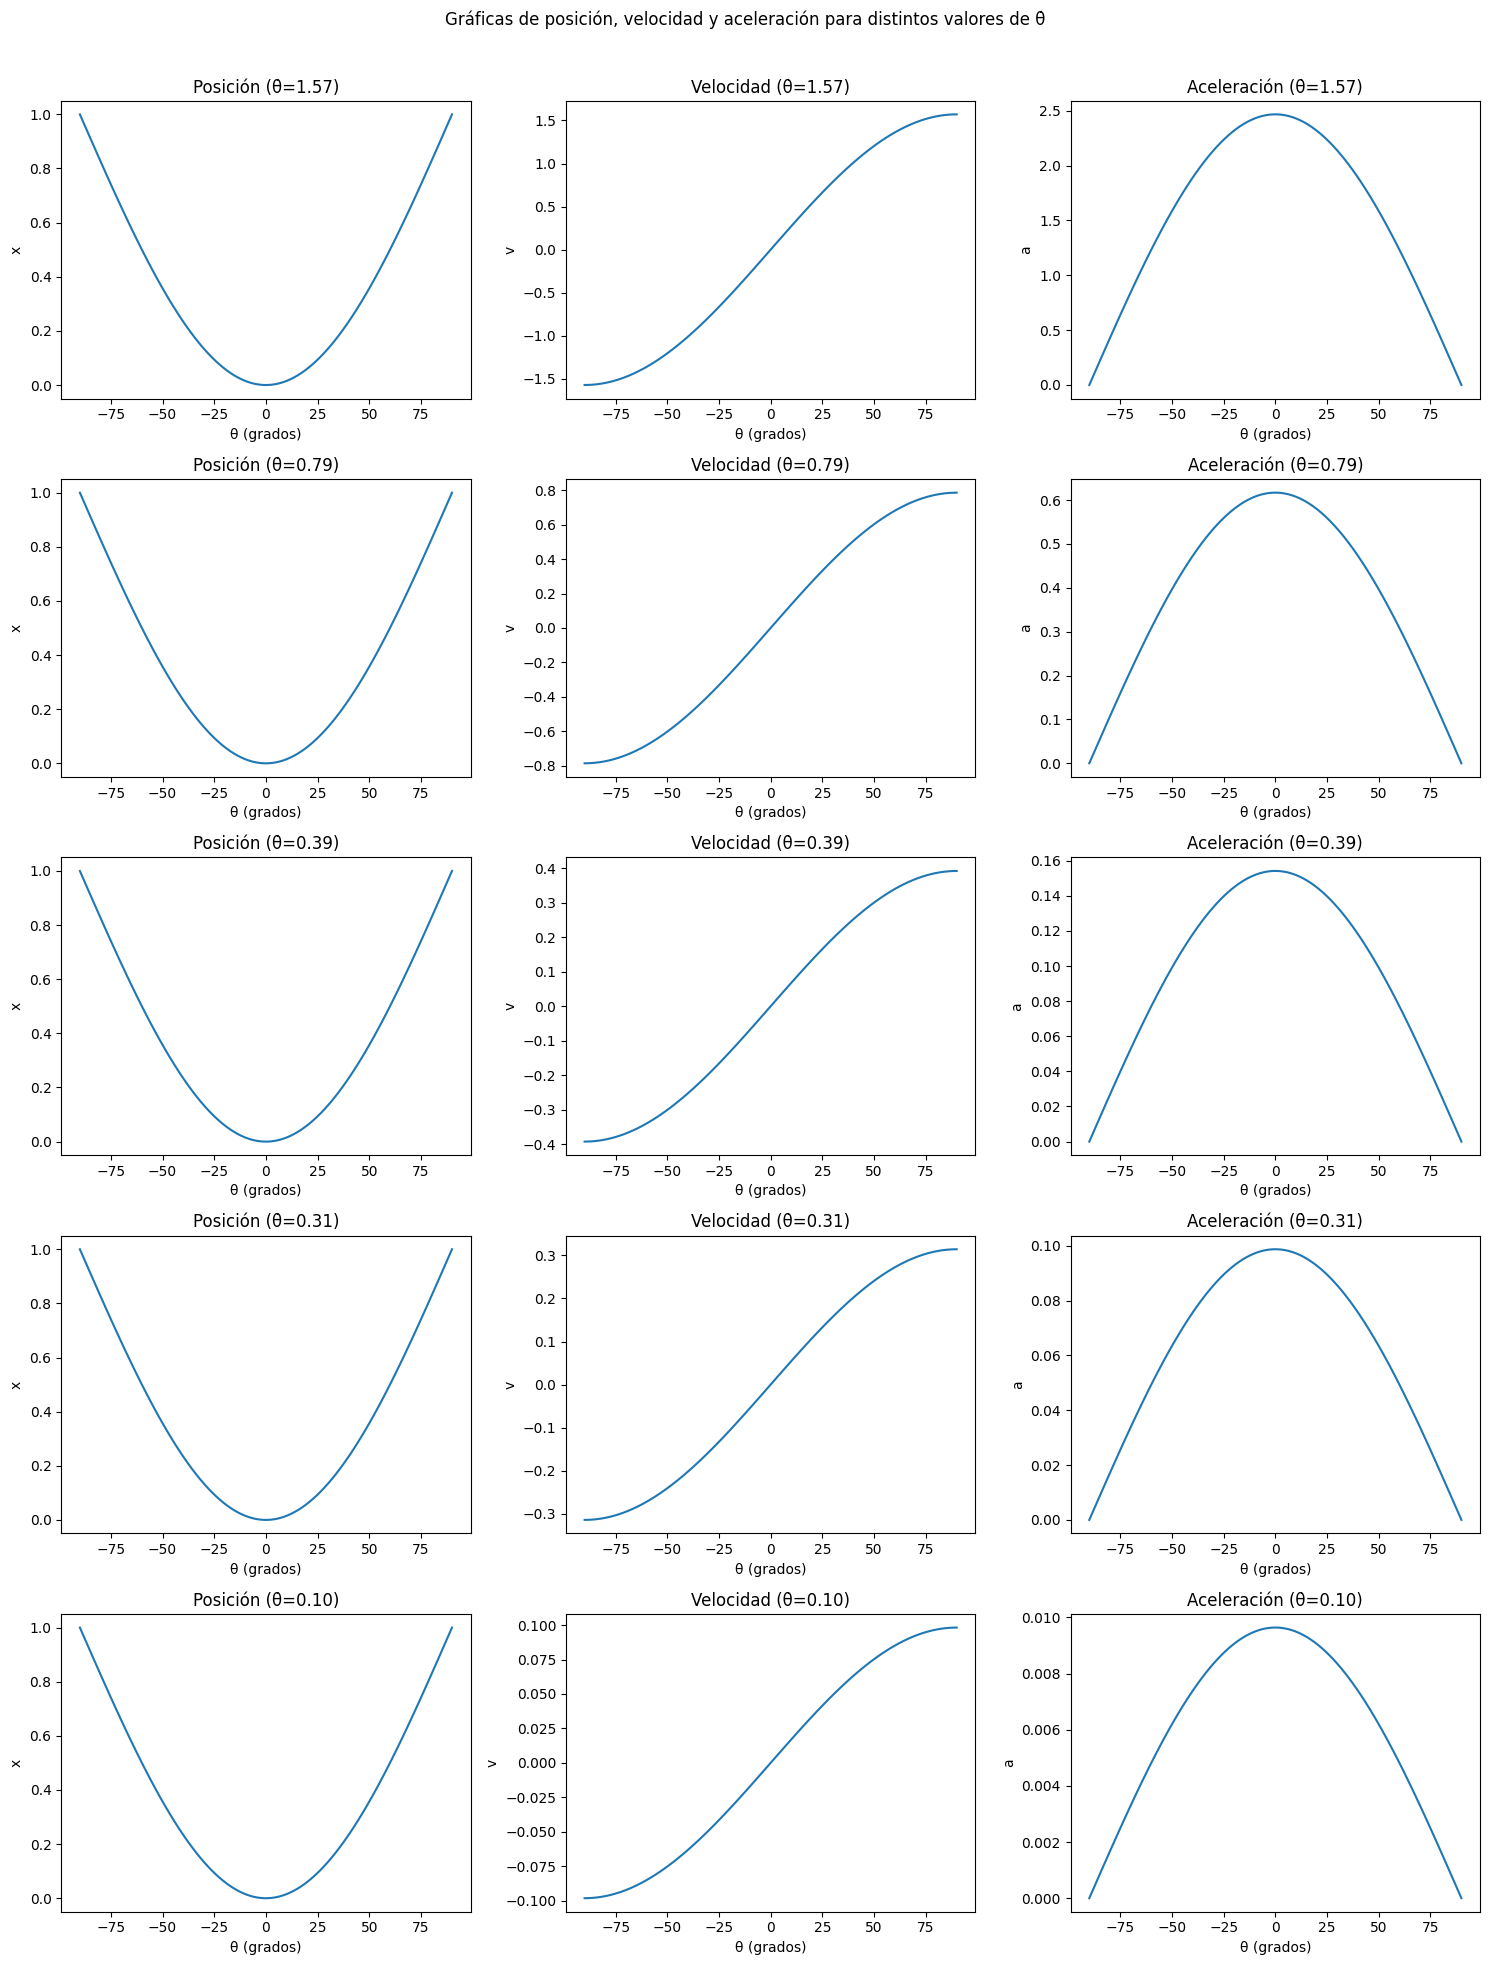

In [66]:
from sympy import lambdify

# Variables constantes y dependientes del tiempo
t, r = symbols('t r')
theta = dynamicsymbols('theta')

# Definición de marcos de referencia
N = ReferenceFrame("N")

x = r*(1-cos(theta))
v = x.diff(t)
a = v.diff(t)

ang_a = theta.diff(t).diff(t)  # Aceleración angular
ang_v = theta.diff(t)

angulos = [pi/2, pi/4, pi/8, pi/10, pi/32]

x = x.subs({ang_a: 0})
v = v.subs({ang_a: 0})
a = a.subs({ang_a: 0})


display(x,v,a)

theta_vals = np.linspace(-np.pi/2, np.pi/2, 100)
r_val = 1 

fig, axs = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle('Gráficas de posición, velocidad y aceleración para distintos valores de θ̇')

for i, angulo in enumerate(angulos):
    # Sustituimos θ̇ por el valor de angulo
    x_func = lambdify(theta, x.subs({ang_v: angulo, r: r_val}), 'numpy')
    v_func = lambdify(theta, v.subs({ang_v: angulo, r: r_val}), 'numpy')
    a_func = lambdify(theta, a.subs({ang_v: angulo, r: r_val}), 'numpy')

    axs[i, 0].plot(np.degrees(theta_vals), x_func(theta_vals))
    axs[i, 0].set_title(f'Posición (θ̇={angulo.evalf():.2f})')
    axs[i, 0].set_xlabel('θ (grados)')
    axs[i, 0].set_ylabel('x')

    axs[i, 1].plot(np.degrees(theta_vals), v_func(theta_vals))
    axs[i, 1].set_title(f'Velocidad (θ̇={angulo.evalf():.2f})')
    axs[i, 1].set_xlabel('θ (grados)')
    axs[i, 1].set_ylabel('v')

    axs[i, 2].plot(np.degrees(theta_vals), a_func(theta_vals))
    axs[i, 2].set_title(f'Aceleración (θ̇={angulo.evalf():.2f})')
    axs[i, 2].set_xlabel('θ (grados)')
    axs[i, 2].set_ylabel('a')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

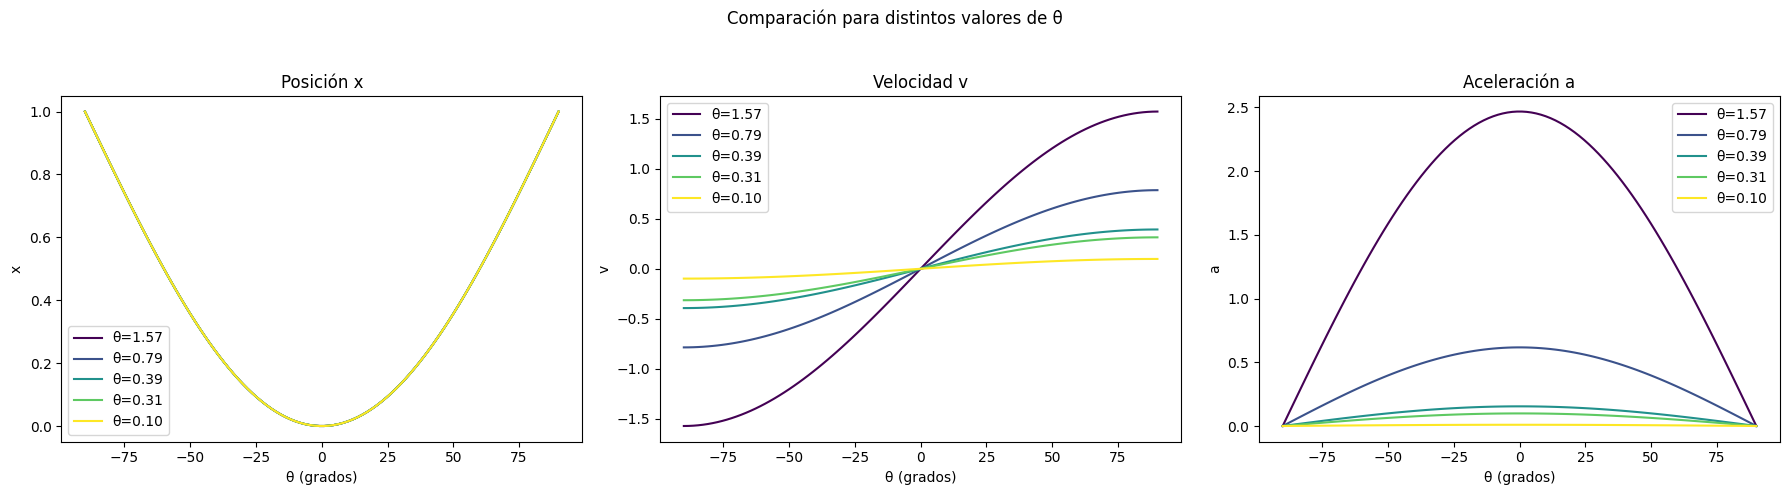

In [67]:
colors = plt.cm.viridis(np.linspace(0, 1, len(angulos)))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación para distintos valores de θ̇')

for angulo, color in zip(angulos, colors):
    x_func = lambdify(theta, x.subs({ang_v: angulo, r: r_val}), 'numpy')
    v_func = lambdify(theta, v.subs({ang_v: angulo, r: r_val}), 'numpy')
    a_func = lambdify(theta, a.subs({ang_v: angulo, r: r_val}), 'numpy')

    axes[0].plot(np.degrees(theta_vals), x_func(theta_vals), label=f'θ̇={angulo.evalf():.2f}', color=color)
    axes[1].plot(np.degrees(theta_vals), v_func(theta_vals), label=f'θ̇={angulo.evalf():.2f}', color=color)
    axes[2].plot(np.degrees(theta_vals), a_func(theta_vals), label=f'θ̇={angulo.evalf():.2f}', color=color)

axes[0].set_title('Posición x')
axes[0].set_xlabel('θ (grados)')
axes[0].set_ylabel('x')
axes[0].legend()

axes[1].set_title('Velocidad v')
axes[1].set_xlabel('θ (grados)')
axes[1].set_ylabel('v')
axes[1].legend()

axes[2].set_title('Aceleración a')
axes[2].set_xlabel('θ (grados)')
axes[2].set_ylabel('a')
axes[2].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Ejercicio clase con el planteamiento númerico en clase

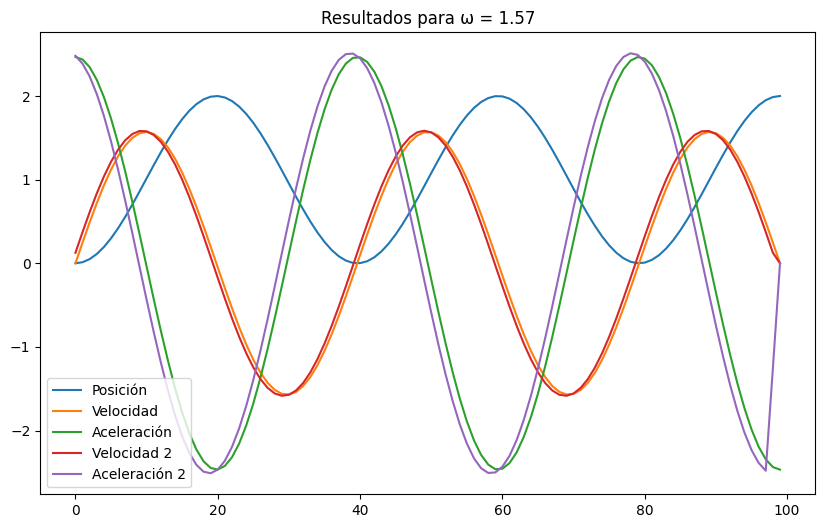

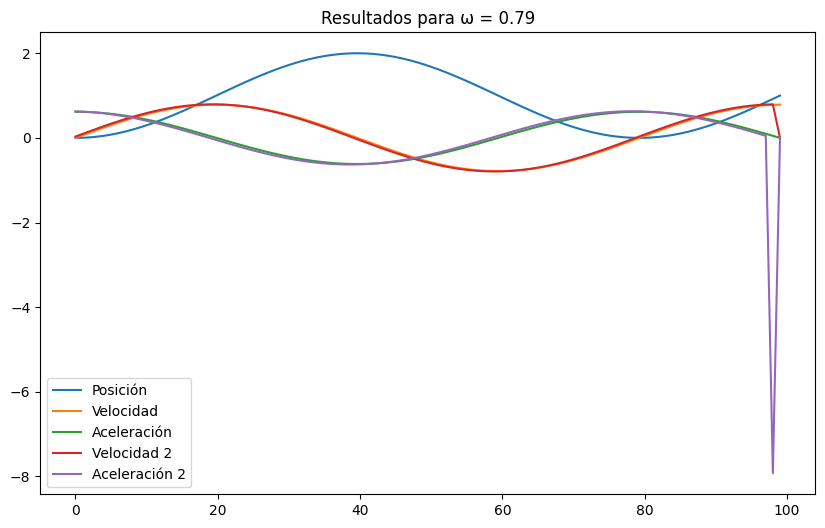

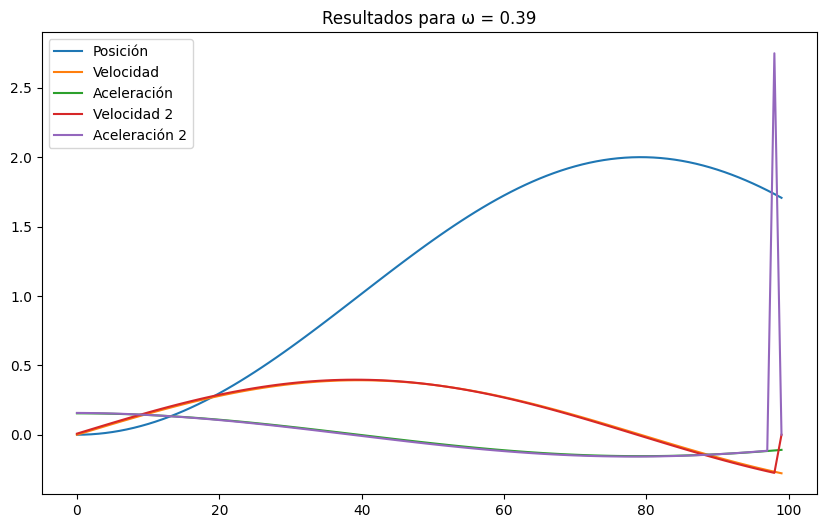

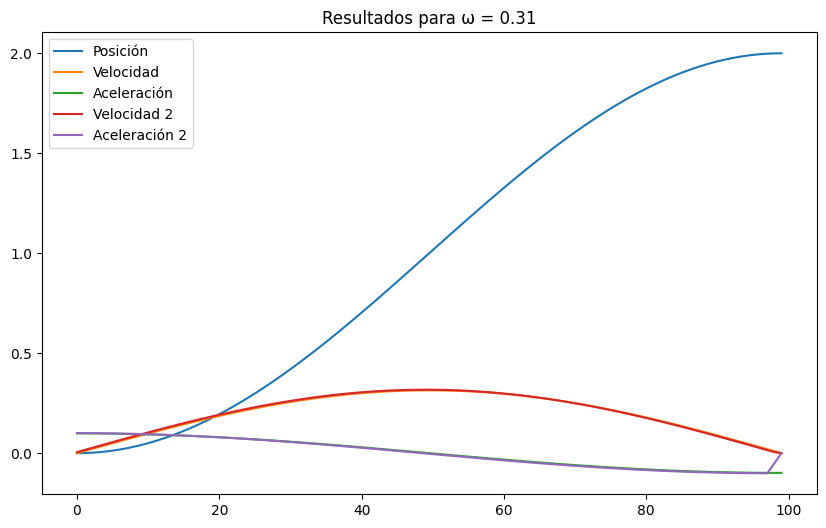

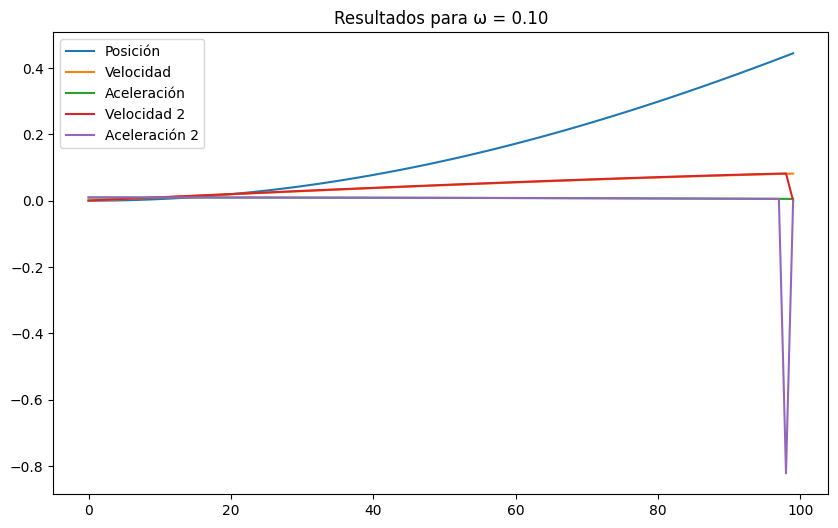

In [68]:
r = 1 #dm
l = 2 #dm

omega = [pi/2, pi/4, pi/8, pi/10, pi/32]

# Si tienen un dt
t = np.linspace(0,10,100)
dt = 0.1

def derivar(variable, dt):
    derivada = [0] * len(variable)
    for i in range(len(variable)):
        if i != len(variable) - 1:
            derivada[i] = (variable[i+1] - variable[i]) / dt
        else:
            derivada[i] = 0
    return derivada

def cinematica(theta, omega):
    global r
    p = r * (1 - np.cos(theta))
    v = r * omega * np.sin(theta)
    a = r * (omega**2) * np.cos(theta)
    v2 = derivar(p, dt)
    a2 = derivar(v2, dt)
    return p, v, a, v2, a2

for angle_speed in omega:
    # Esto es un arreglo barato porque no pude ser simbólico, entonces lo evaluo jajaja
    omega_val = float(angle_speed.evalf())
    theta = omega_val * t
    posicion_l, velocidad_l, aceleracion_l, velocidad_2, aceleracion_2 = cinematica(theta, omega_val)

    plt.figure(figsize=(10,6))
    plt.plot(posicion_l, label='Posición')
    plt.plot(velocidad_l, label='Velocidad')
    plt.plot(aceleracion_l, label='Aceleración')
    plt.plot(velocidad_2, label='Velocidad 2')
    plt.plot(aceleracion_2, label='Aceleración 2')
    plt.title(f'Resultados para ω = {omega_val:.2f}')
    plt.legend()
    plt.show()
    



In [69]:
def rms(x, y):
    return np.sqrt(np.mean((x - y)**2))

for angle_speed in omega:
    # Evaluar omega como float
    omega_val = float(angle_speed.evalf())
    theta = omega_val * t
    posicion_l, velocidad_l, aceleracion_l, velocidad_2, aceleracion_2 = cinematica(theta, omega_val)

    # Calcular RMS
    rms_v = rms(velocidad_l, velocidad_2)
    rms_a = rms(aceleracion_l, aceleracion_2)

    print(f"ω = {omega_val:.2f} → RMS(V vs V2) = {rms_v:.4f}, RMS(A vs A2) = {rms_a:.4f}")

ω = 1.57 → RMS(V vs V2) = 0.0886, RMS(A vs A2) = 0.3909
ω = 0.79 → RMS(V vs V2) = 0.0820, RMS(A vs A2) = 0.7981
ω = 0.39 → RMS(V vs V2) = 0.0286, RMS(A vs A2) = 0.2864
ω = 0.31 → RMS(V vs V2) = 0.0042, RMS(A vs A2) = 0.0113
ω = 0.10 → RMS(V vs V2) = 0.0082, RMS(A vs A2) = 0.0827
